## 0. Загрузка и разведочный анализ данных
Для работы с данными мы загружаем три файла CSV:
- `flights.csv` – информация о рейсах.
- `airports.csv` – справочник аэропортов.
- `airlines.csv` – справочник авиакомпаний.

Так как `flights.csv` – это большой файл, его загрузка может занять много памяти.  
Чтобы уменьшить потребление памяти, мы заранее указываем `dtype` для каждого столбца а также используем более компактные типы данных (`int8`, `int16` и `float32`).

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


airports_path, airlines_path, flights_path = "Materials/airports.csv", "Materials/airlines.csv", "Materials/flights.csv"

dtype_dict = {
    "YEAR": "int16",
    "MONTH": "int8",
    "DAY": "int8",
    "DAY_OF_WEEK": "int8",
    "AIRLINE": "category",
    "FLIGHT_NUMBER": "int32",
    "TAIL_NUMBER": "category",
    "ORIGIN_AIRPORT": "category",
    "DESTINATION_AIRPORT": "category",
    "SCHEDULED_DEPARTURE": "float32",
    "DEPARTURE_TIME": "float32",
    "DEPARTURE_DELAY": "float32",
    "TAXI_OUT": "float32",
    "WHEELS_OFF": "float32",
    "SCHEDULED_TIME": "float32",
    "ELAPSED_TIME": "float32",
    "AIR_TIME": "float32",
    "DISTANCE": "int32",
    "WHEELS_ON": "float32",
    "TAXI_IN": "float32",
    "SCHEDULED_ARRIVAL": "float32",
    "ARRIVAL_TIME": "float32",
    "ARRIVAL_DELAY": "float32",
    "DIVERTED": "int8",
    "CANCELLED": "int8",
    "CANCELLATION_REASON": "category",
    "AIR_SYSTEM_DELAY": "float32",
    "SECURITY_DELAY": "float32",
    "AIRLINE_DELAY": "float32",
    "LATE_AIRCRAFT_DELAY": "float32",
    "WEATHER_DELAY": "float32"
}



flights_data = pd.read_csv(flights_path, dtype=dtype_dict, low_memory=False)
airports_data = pd.read_csv(airports_path)
airlines_data = pd.read_csv(airlines_path)

day_labels = ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]

delay_reasons = {
    "AIRLINE_DELAY": "Авиакомпания",
    "LATE_AIRCRAFT_DELAY": "Поздний самолет",
    "AIR_SYSTEM_DELAY": "Система управления полетами",
    "WEATHER_DELAY": "Погода",
    "SECURITY_DELAY": "Безопасность"
}

delay_colors = {
    "AIRLINE_DELAY": "red",
    "LATE_AIRCRAFT_DELAY": "orange",
    "AIR_SYSTEM_DELAY": "#FFD966",
    "WEATHER_DELAY": "lightgreen",
    "SECURITY_DELAY": "green"
}

Проведем разведочный анализ данных.

1. Найдем аэропорты, которые есть в flights_data, но отсутствуют в airports_data.
2. Найдем авиалинии, которые есть в flights_data, но отсутствуют в airlines_data.

Выведем эти аэропорты и авиалинии, а также рейсы, которые содержат эти аэропорты и авиалинии.

In [7]:
unique_airports_in_flights = set(flights_data["ORIGIN_AIRPORT"].unique()) | set(flights_data["DESTINATION_AIRPORT"].unique())
unique_airports_in_data = set(airports_data["IATA_CODE"].unique())
missing_airports = unique_airports_in_flights - unique_airports_in_data

print("Airport codes in flights_data that are NOT in airports_data")
print(missing_airports)

unique_airlines_in_flights = set(flights_data["AIRLINE"].unique())
unique_airlines_in_data = set(airlines_data["IATA_CODE"].unique())
missing_airlines = unique_airlines_in_flights - unique_airlines_in_data

print("\nAirline codes in flights_data that are NOT in airlines_data")
print(missing_airlines)

missing_airport_records = flights_data[
    flights_data["ORIGIN_AIRPORT"].isin(missing_airports) | 
    flights_data["DESTINATION_AIRPORT"].isin(missing_airports)
]

missing_airline_records = flights_data[
    flights_data["AIRLINE"].isin(missing_airlines)
]

print("\nFlight records with missing airport codes")
display(missing_airport_records[["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].drop_duplicates())

print("\nFlight records with missing airline codes")
display(missing_airline_records[["AIRLINE"]].drop_duplicates())



Airport codes in flights_data that are NOT in airports_data
{'12129', '13577', '12448', '13964', '13495', '15380', '14783', '12884', '13541', '14679', '10529', '11013', '15027', '11413', '12278', '14107', '14685', '13198', '10926', '11537', '11986', '12007', '10631', '14576', '13502', '13795', '12402', '12255', '10781', '11111', '12889', '15370', '11587', '15607', '14254', '14256', '12266', '11471', '10620', '13290', '16218', '14492', '15356', '11898', '11298', '11617', '10257', '15841', '11337', '11259', '13342', '10800', '12003', '12191', '12156', '12391', '12323', '14831', '11315', '14908', '15249', '14520', '12280', '14487', '11648', '10299', '14006', '11540', '11995', '10279', '14698', '11973', '11775', '14113', '13486', '12094', '11980', '12177', '13933', '11503', '14843', '13796', '12758', '14711', '12441', '13851', '10185', '11109', '13433', '11953', '11721', '11638', '13367', '12265', '14321', '10577', '10728', '10785', '11203', '14828', '10779', '15412', '10980', '12896', '11

,ORIGIN_AIRPORT,DESTINATION_AIRPORT
4385712,14747,11298
4385713,14771,13487
4385714,12889,13487
4385715,12892,13303
4385716,14771,11057
...,...,...
4867188,15024,11618
4868075,14843,12264
4871058,12892,11884
4871354,14057,10713



Flight records with missing airline codes


,AIRLINE


Заметили много лишних аэропортов в flights_data.
Очистим данные от них, и дальше будем использовать flights_data_clean.

In [11]:
flights_data_clean = flights_data.loc[
    ~(
        flights_data["ORIGIN_AIRPORT"].isin(missing_airports) | 
        flights_data["DESTINATION_AIRPORT"].isin(missing_airports)
    )
]

## 📊 1. Анализ рейсов и задержек по дням недели

Теперь давайте изучим, как распределяются рейсы и задержки по дням недели.  
Мы построим шесть графиков, которые помогут выявить закономерности:

1. **Общее количество рейсов по дням недели** – показывает, сколько было полетов в каждый из дней.
2. **Процент задержанных рейсов** – отображает долю рейсов, которые имели любую положительную задержку.
3. **Процент сильно задержанных рейсов** – показывает, сколько рейсов были задержаны более чем на 20 минут.
4. **Средняя задержка по дням недели** – помогает определить, в какие дни среднее время задержки выше.
5. **Задержки из-за загруженности авиасистемы** – анализирует влияние авиадиспетчерских служб на задержки.
6. **Задержки из-за позднего прибытия самолёта** – исследует случаи, когда самолёт опаздывает на предыдущем рейсе, что вызывает последующие задержки.

Далее мы визуализируем данные и рассмотрим их подробнее.



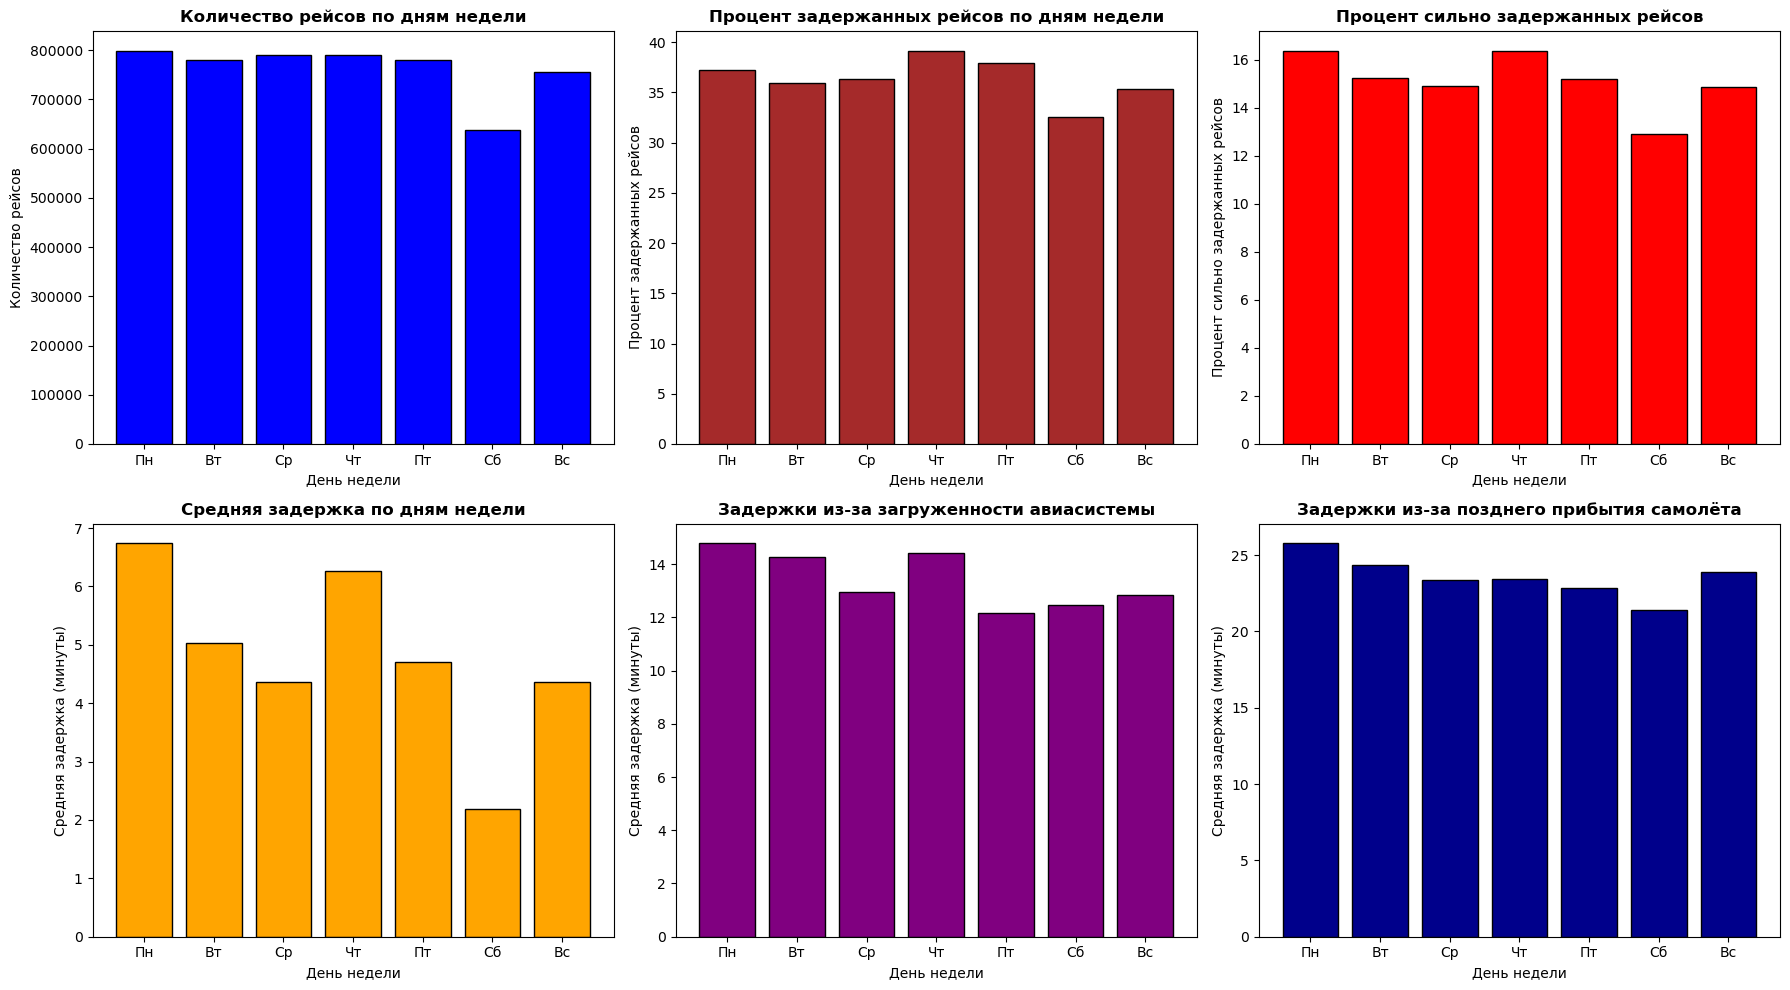

In [13]:
flights_per_day = flights_data_clean["DAY_OF_WEEK"].value_counts().sort_index()
avg_delay = flights_data_clean.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"].mean()
flights_data_clean.loc[:, "DELAYED"] = flights_data_clean["ARRIVAL_DELAY"] > 0
flights_data_clean.loc[:, "HEAVILY_DELAYED"] = flights_data_clean["ARRIVAL_DELAY"] > 20
delayed_ratio = flights_data_clean.groupby("DAY_OF_WEEK")["DELAYED"].mean() * 100
heavily_delayed_ratio = flights_data_clean.groupby("DAY_OF_WEEK")["HEAVILY_DELAYED"].mean() * 100

air_system_delay = flights_data_clean.groupby("DAY_OF_WEEK")["AIR_SYSTEM_DELAY"].mean()
late_aircraft_delay = flights_data_clean.groupby("DAY_OF_WEEK")["LATE_AIRCRAFT_DELAY"].mean()

fig, axes = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [1, 1]})

axes[0, 0].bar(flights_per_day.index, flights_per_day.values, color="blue", edgecolor="black")
axes[0, 0].set_xticks(range(1, 8))
axes[0, 0].set_xticklabels(day_labels)
axes[0, 0].set_xlabel("День недели")
axes[0, 0].set_ylabel("Количество рейсов")
axes[0, 0].set_title("Количество рейсов по дням недели", fontweight="bold")

axes[0, 1].bar(delayed_ratio.index, delayed_ratio.values, color="brown", edgecolor="black")
axes[0, 1].set_xticks(range(1, 8))
axes[0, 1].set_xticklabels(day_labels)
axes[0, 1].set_xlabel("День недели")
axes[0, 1].set_ylabel("Процент задержанных рейсов")
axes[0, 1].set_title("Процент задержанных рейсов по дням недели", fontweight="bold")

axes[0, 2].bar(heavily_delayed_ratio.index, heavily_delayed_ratio.values, color="red", edgecolor="black")
axes[0, 2].set_xticks(range(1, 8))
axes[0, 2].set_xticklabels(day_labels)
axes[0, 2].set_xlabel("День недели")
axes[0, 2].set_ylabel("Процент сильно задержанных рейсов")
axes[0, 2].set_title("Процент сильно задержанных рейсов", fontweight="bold")

axes[1, 0].bar(avg_delay.index, avg_delay.values, color="orange", edgecolor="black")
axes[1, 0].set_xticks(range(1, 8))
axes[1, 0].set_xticklabels(day_labels)
axes[1, 0].set_xlabel("День недели")
axes[1, 0].set_ylabel("Средняя задержка (минуты)")
axes[1, 0].set_title("Средняя задержка по дням недели", fontweight="bold")

axes[1, 1].bar(air_system_delay.index, air_system_delay.values, color="purple", edgecolor="black")
axes[1, 1].set_xticks(range(1, 8))
axes[1, 1].set_xticklabels(day_labels)
axes[1, 1].set_xlabel("День недели")
axes[1, 1].set_ylabel("Средняя задержка (минуты)")
axes[1, 1].set_title("Задержки из-за загруженности авиасистемы", fontweight="bold")

axes[1, 2].bar(late_aircraft_delay.index, late_aircraft_delay.values, color="darkblue", edgecolor="black")
axes[1, 2].set_xticks(range(1, 8))
axes[1, 2].set_xticklabels(day_labels)
axes[1, 2].set_xlabel("День недели")
axes[1, 2].set_ylabel("Средняя задержка (минуты)")
axes[1, 2].set_title("Задержки из-за позднего прибытия самолёта", fontweight="bold")

plt.tight_layout()
plt.show()


## Выводы:
На основе построенных графиков можно сделать важный вывод: **чем больше рейсов выполняется в день, тем выше вероятность задержек**.

- Наибольшее количество рейсов выполняется в понедельник, четверг и пятницу, в эти же дни фиксируется максимальные проценты задержанных рейсов.
- В субботу, когда рейсов значительно меньше, процент задержанных и сильно задержанных рейсов (больше 20 минут) также явно падает.
---
- Средняя задержка рейса выше всего в понедельник и четверг – самые загруженные дни.
- В субботу средняя задержка минимальна, что соответствует наименьшему числу рейсов.
---
- Также наглядно видно, что в дни с наибольшим количеством рейсом больше всего задержек по причине загруженности авиасистемы и позднего прибытия прошлого рейса, из-за чего возникает цепная реакция.

**Рекомендации:**
1. Перераспределить рейсы так, чтобы снизить перегрузку в понедельник и четверг, сделать ее более равномерной.
2. Увеличить мощность авиадиспетчерской службы в наиболее загруженные дни.
3. По возможности избегать поездок по понедельникам, четвергам и пятницам, если задержки критичны.

## 📊 2. Анализ авиакомпаний

Теперь давайте изучим, как различные авиакомпании справляются с расписанием и задержками рейсов.
Мы построили несколько графиков, которые помогают выявить закономерности:

1. **Средняя задержка рейсов** – учитываются только случаи, когда задержка положительная.
2. **Причины задержек** – показывает, какие факторы (авиакомпания, поздний самолет, погода и т.д.) вносят наибольший вклад в общее время опозданий.
3. **Распределение задержек по продолжительности** – разбивает рейсы по категориям: без задержки, 0–10 минут, 10–20 минут, 20–30 минут, свыше 30 минут.
4. **Число рейсов и доля задержанных рейсов** – показывает, сколько всего рейсов выполняет авиакомпания и каков процент задержанных (DELAYED) и сильно задержанных (HEAVILY_DELAYED) среди них.

Далее мы визуализируем данные и рассмотрим их подробнее. Основная цель — выявить, какие авиакомпании больше всего подвержены опозданиям, и какие, наоборот, работают наиболее пунктуально.




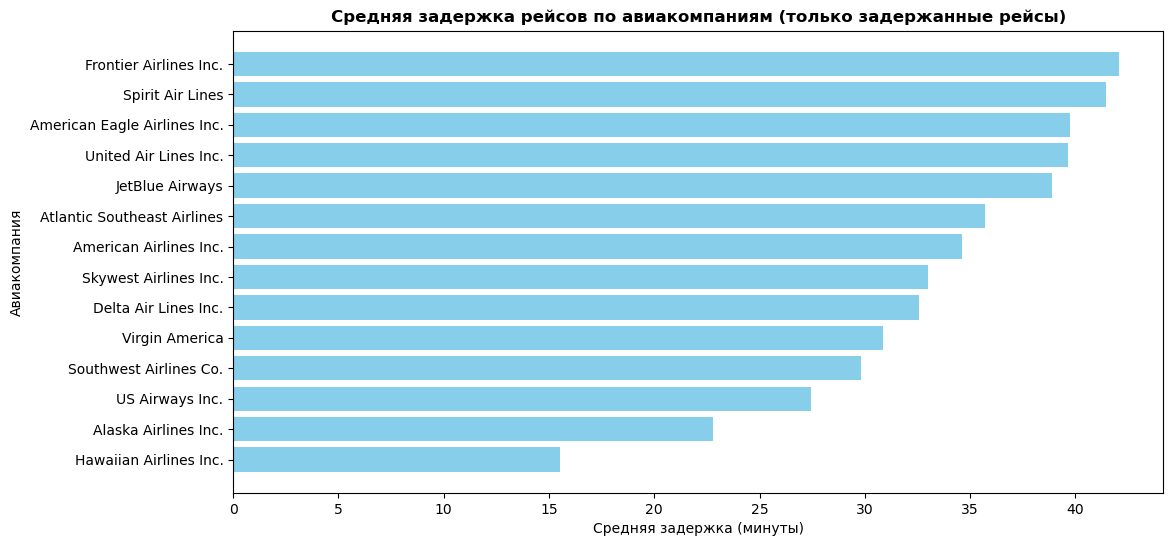

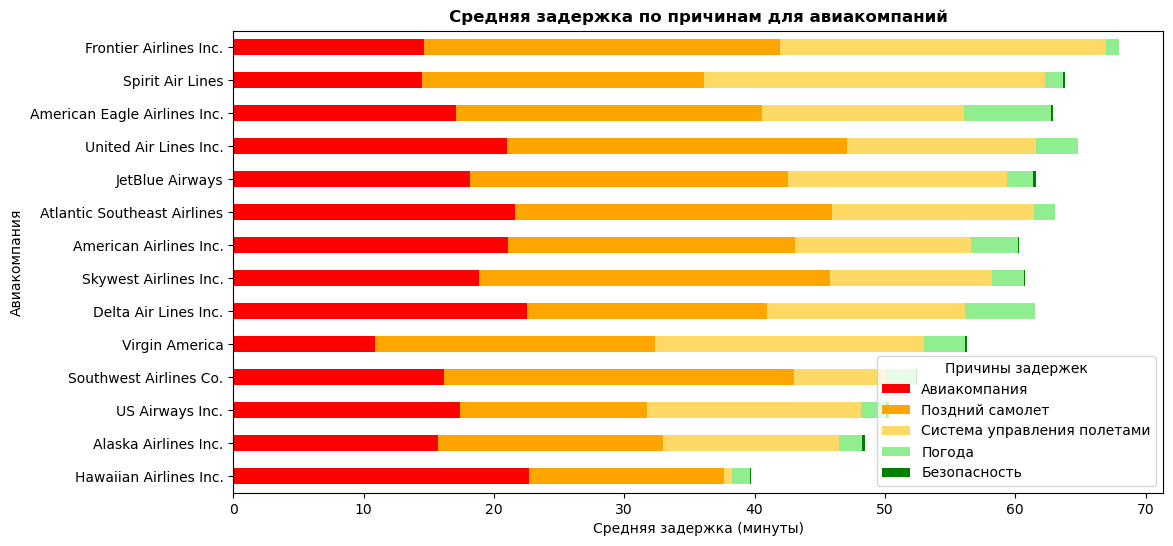

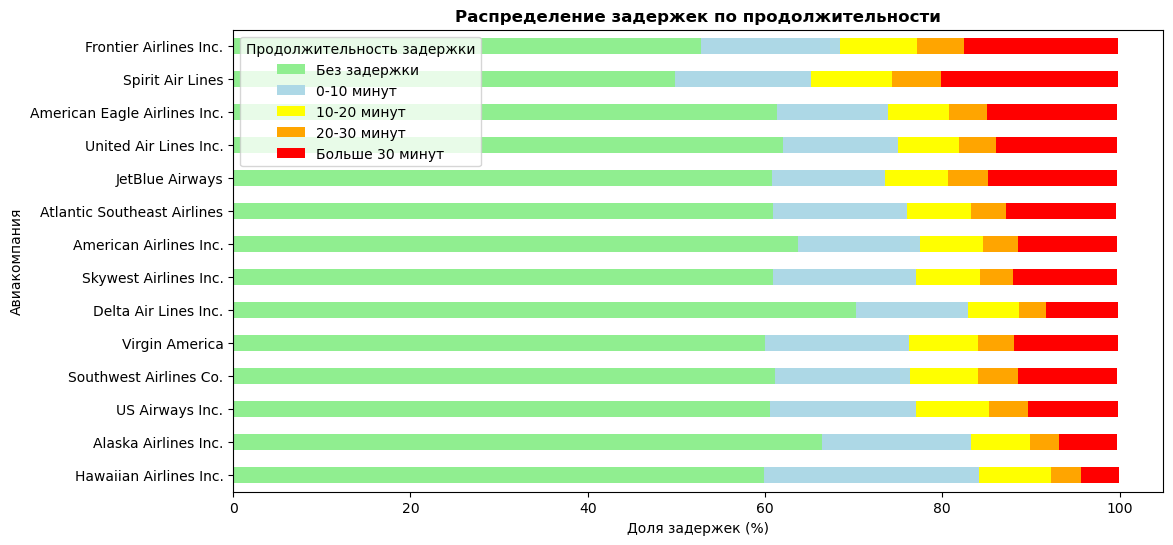

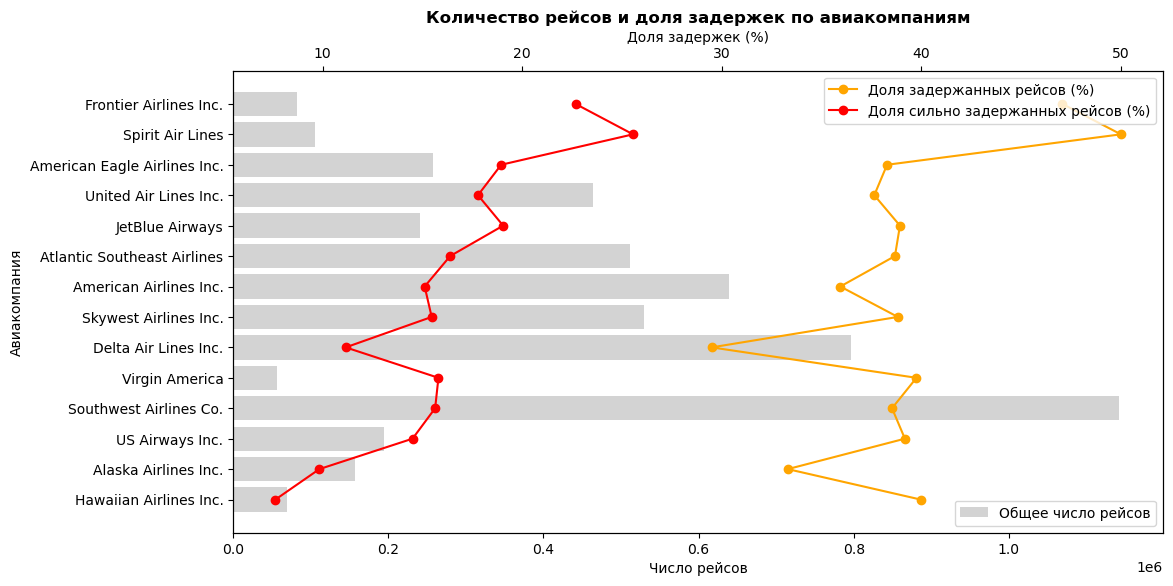

In [14]:
flights_data_clean.loc[:, "DELAYED"] = flights_data_clean["ARRIVAL_DELAY"] > 0
flights_data_clean.loc[:, "HEAVILY_DELAYED"] = flights_data_clean["ARRIVAL_DELAY"] > 20

valid_flights = flights_data_clean[flights_data_clean["CANCELLED"] == 0]

airline_delays = valid_flights[valid_flights["ARRIVAL_DELAY"] > 0].groupby("AIRLINE", observed=True)["ARRIVAL_DELAY"].mean().sort_values(ascending=False)
airline_delays = airline_delays.reset_index().merge(airlines_data, left_on="AIRLINE", right_on="IATA_CODE").set_index("AIRLINE_y")

plt.figure(figsize=(12, 6))
plt.barh(airline_delays.index, airline_delays["ARRIVAL_DELAY"], color="skyblue")
plt.xlabel("Средняя задержка (минуты)")
plt.ylabel("Авиакомпания")
plt.title("Средняя задержка рейсов по авиакомпаниям (только задержанные рейсы)", fontweight="bold")
plt.gca().invert_yaxis()
plt.show()

airline_delay_reasons = valid_flights.groupby("AIRLINE", observed=True)[list(delay_reasons.keys())].mean()
airline_delay_reasons = airline_delay_reasons.reset_index().merge(airlines_data, left_on="AIRLINE", right_on="IATA_CODE").set_index("AIRLINE_y")
airline_delay_reasons = airline_delay_reasons.reindex(airline_delays.index)

fig, ax = plt.subplots(figsize=(12, 6))
airline_delay_reasons.rename(columns=delay_reasons).plot(kind="barh", stacked=True, ax=ax, color=[delay_colors[key] for key in delay_reasons])
plt.xlabel("Средняя задержка (минуты)")
plt.ylabel("Авиакомпания")
plt.title("Средняя задержка по причинам для авиакомпаний", fontweight="bold")
plt.legend(title="Причины задержек")
plt.gca().invert_yaxis()
plt.show()

valid_flights = valid_flights.copy()
valid_flights["NO_DELAY"] = valid_flights["ARRIVAL_DELAY"] <= 0
valid_flights["DELAY_0_10"] = (valid_flights["ARRIVAL_DELAY"] > 0) & (valid_flights["ARRIVAL_DELAY"] <= 10)
valid_flights["DELAY_10_20"] = (valid_flights["ARRIVAL_DELAY"] > 10) & (valid_flights["ARRIVAL_DELAY"] <= 20)
valid_flights["DELAY_20_30"] = (valid_flights["ARRIVAL_DELAY"] > 20) & (valid_flights["ARRIVAL_DELAY"] <= 30)
valid_flights["DELAY_GT_30"] = valid_flights["ARRIVAL_DELAY"] > 30

delay_counts = valid_flights.groupby("AIRLINE", observed=True)[["NO_DELAY", "DELAY_0_10", "DELAY_10_20", "DELAY_20_30", "DELAY_GT_30"]].mean() * 100
delay_counts = delay_counts.reset_index().merge(airlines_data, left_on="AIRLINE", right_on="IATA_CODE").set_index("AIRLINE_y")
delay_counts = delay_counts.reindex(airline_delays.index)

fig, ax = plt.subplots(figsize=(12, 6))
delay_counts.plot(kind="barh", stacked=True, ax=ax, color=["lightgreen", "lightblue", "yellow", "orange", "red"])
plt.xlabel("Доля задержек (%)")
plt.ylabel("Авиакомпания")
plt.title("Распределение задержек по продолжительности", fontweight="bold")
plt.legend(["Без задержки", "0-10 минут", "10-20 минут", "20-30 минут", "Больше 30 минут"], title="Продолжительность задержки")
plt.gca().invert_yaxis()
plt.show()

flight_counts = valid_flights.groupby("AIRLINE", observed=True).agg(
    total_flights=("FLIGHT_NUMBER", "count"),
    delayed_flights=("DELAYED", "sum"),
    heavily_delayed_flights=("HEAVILY_DELAYED", "sum")
)

flight_counts["delayed_flights"] = flight_counts["delayed_flights"] / flight_counts["total_flights"] * 100
flight_counts["heavily_delayed_flights"] = flight_counts["heavily_delayed_flights"] / flight_counts["total_flights"] * 100
flight_counts = flight_counts.reset_index().merge(airlines_data, left_on="AIRLINE", right_on="IATA_CODE").set_index("AIRLINE_y")
flight_counts = flight_counts.reindex(airline_delays.index)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.barh(flight_counts.index, flight_counts["total_flights"], color="lightgray", label="Общее число рейсов")
ax2 = ax1.twiny()
ax2.plot(flight_counts["delayed_flights"], flight_counts.index, "o-", color="orange", label="Доля задержанных рейсов (%)")
ax2.plot(flight_counts["heavily_delayed_flights"], flight_counts.index, "o-", color="red", label="Доля сильно задержанных рейсов (%)")

ax1.set_xlabel("Число рейсов")
ax1.set_ylabel("Авиакомпания")
ax1.set_title("Количество рейсов и доля задержек по авиакомпаниям", fontweight="bold")
ax2.set_xlabel("Доля задержек (%)")
ax1.legend(loc="lower right")
ax2.legend(loc="upper right")
plt.gca().invert_yaxis()
plt.show()



## Выводы
### Худшие авиакомпании по задержкам
**1. Frontier Airlines**
- На графике средней задержки занимает верхнюю позицию, показывая около 40 минут задержки.
- Из графика с распределением задержек видно, что значительная доля рейсов уходит в категорию «20–30 минут» и «больше 30 минут».
- Причины задержек чаще всего связаны с самой авиакомпанией (AIRLINE_DELAY) и поздним прибытием самолёта (LATE_AIRCRAFT_DELAY), что указывает на необходимость пересмотра логистики и улучшения оперативного планирования.

**2. Spirit Air Lines**
- Заметно высокие средние задержки, особенно в пиковые периоды, когда общее число рейсов велико.
- На диаграмме с причинами задержек видно, что у Spirit также преобладают внутренние факторы (AIRLINE_DELAY), а высокая доля «больше 30 минут» говорит о том, что цепные задержки могут приводить к срывам графика.
- Необходимо увеличить количество резервных бортов и усилить контроль за точностью обслуживания, чтобы снизить процент длительных задержек.

**3. American Eagle Airlines**
- Хотя средняя задержка чуть ниже, чем у первых двух, доля рейсов с задержками 20–30 и более 30 минут всё равно высока.
- График причин задержек показывает заметную долю AIRLINE_DELAY, что свидетельствует о проблемах в координации наземных служб и расписания.
- Повышение эффективности управления наземным персоналом и оптимизация интервалов между рейсами помогут уменьшить общую продолжительность опозданий.

### Лучшая авиакомпания по задержкам
**Alaska Airlines**
- Демонстрирует одну из самых низких средних задержек, а доля рейсов с опозданием более 30 минут минимальна.
- Из причин задержек преобладают внешние факторы (например, погода), тогда как внутренние проблемы (AIRLINE_DELAY, LATE_AIRCRAFT_DELAY) практически не влияют.
- Такая стабильность указывает на хорошо отлаженные процессы планирования и обслуживания самолётов.


## 📊 3. Анализ рейсов и задержек по диапазонам расстояний

Теперь давайте изучим, как дистанция полёта влияет на вероятность и продолжительность задержек.
Мы построили три графика, которые помогут выявить закономерности:

1. **Частота задержек вылета по диапазонам расстояний** – показывает долю рейсов, имеющих любую положительную задержку (>0 минут), а также сильно задержанных рейсов (>20 минут), в каждом диапазоне дистанций.
2. **Распределение причин задержек по диапазонам расстояний** – отображает вклад различных факторов (авиакомпания, поздний самолёт, погода и т.д.) в общую структуру задержек в зависимости от дальности полёта.
3. **Средняя задержка вылета по диапазонам расстояний** – позволяет увидеть, как меняется средняя продолжительность задержки при увеличении дистанции.

Далее мы визуализируем данные и рассмотрим их подробнее.



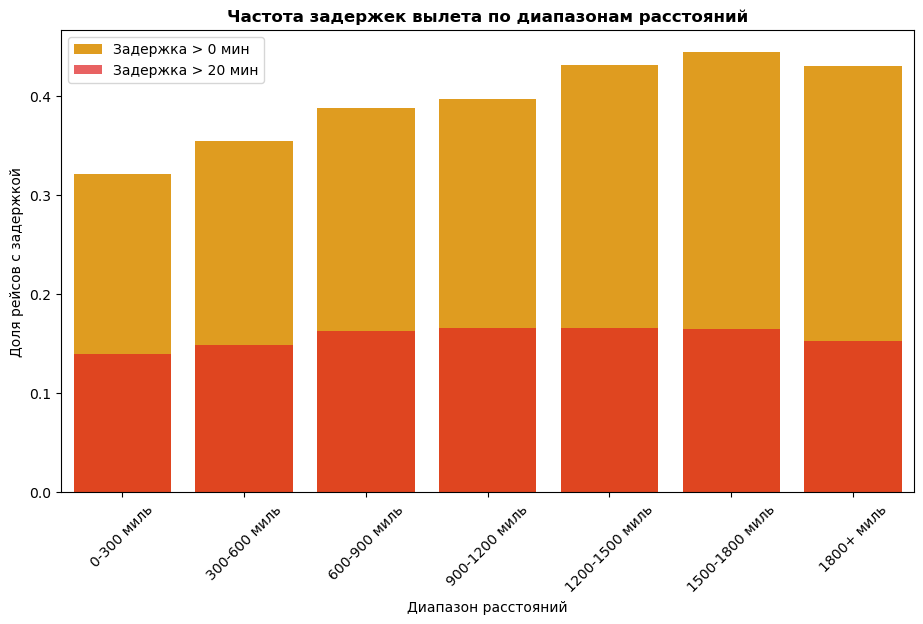

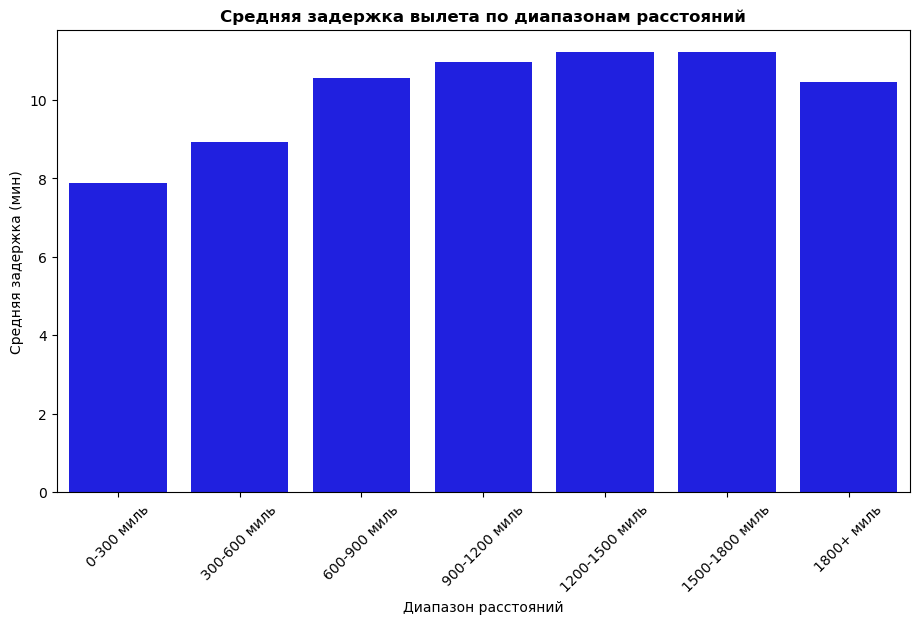

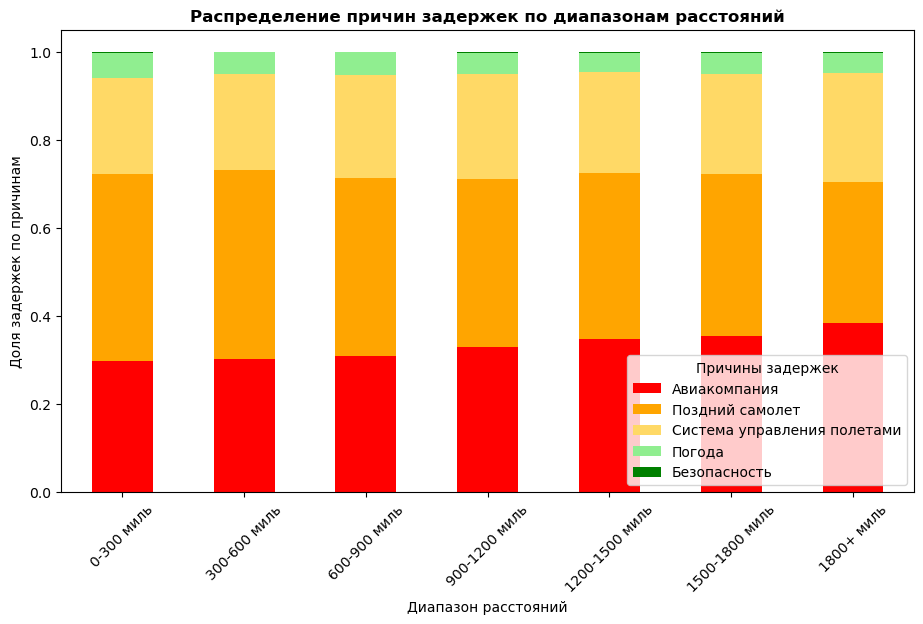

In [15]:
import seaborn as sns

flights_data_clean = flights_data_clean.dropna(subset=["DISTANCE", "DEPARTURE_DELAY"])

bins = [0, 300, 600, 900, 1200, 1500, 1800, flights_data_clean["DISTANCE"].max()]
labels = ["0-300 миль", "300-600 миль", "600-900 миль", "900-1200 миль", "1200-1500 миль", "1500-1800 миль", "1800+ миль"]

flights_data_clean["DISTANCE_BIN"] = pd.cut(flights_data_clean["DISTANCE"], bins=bins, labels=labels, right=False)

delayed_flights = flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 0].groupby("DISTANCE_BIN", observed=True).size()
severely_delayed_flights = flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 20].groupby("DISTANCE_BIN", observed=True).size()
total_flights = flights_data_clean.groupby("DISTANCE_BIN", observed=True).size()

delay_ratio = (delayed_flights / total_flights).fillna(0)
severe_delay_ratio = (severely_delayed_flights / total_flights).fillna(0)

plt.figure(figsize=(11, 6))
sns.barplot(x=labels, y=delay_ratio.values, color="orange", label="Задержка > 0 мин")
sns.barplot(x=labels, y=severe_delay_ratio.values, color="red", label="Задержка > 20 мин", alpha=0.7)

plt.xlabel("Диапазон расстояний")
plt.ylabel("Доля рейсов с задержкой")
plt.title("Частота задержек вылета по диапазонам расстояний", fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.show()

mean_delay = flights_data_clean.groupby("DISTANCE_BIN", observed=True)["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(11, 6))
sns.barplot(x=labels, y=mean_delay.values, color="blue")

plt.xlabel("Диапазон расстояний")
plt.ylabel("Средняя задержка (мин)")
plt.title("Средняя задержка вылета по диапазонам расстояний", fontweight="bold")
plt.xticks(rotation=45)
plt.show()

reasons_data = flights_data_clean.groupby("DISTANCE_BIN", observed=True)[list(delay_reasons.keys())].sum()
reasons_ratio = reasons_data.div(reasons_data.sum(axis=1), axis=0).fillna(0)

reasons_ratio.rename(columns=delay_reasons).plot(kind="bar", stacked=True, color=[delay_colors[k] for k in delay_reasons], figsize=(11, 6))

plt.xlabel("Диапазон расстояний")
plt.ylabel("Доля задержек по причинам")
plt.title("Распределение причин задержек по диапазонам расстояний", fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Причины задержек")
plt.show()

## Выводы:
- Чем больше расстояние, тем выше вероятность задержки. Доля рейсов с опозданием растёт от коротких перелётов (0–300 миль) к дальним (1800+ миль), причём увеличивается и доля сильно задержанных рейсов (>20 минут).
- Основные причины задержек остаются схожими во всех диапазонах: большую часть времени занимают задержки, связанные с авиакомпанией и поздним прибытием самолёта. Однако для более дальних рейсов заметен рост задержек, связанных с системой управления полётами и авиакомпанией (большее число пролетов через загруженные воздушные коридоры).
- Средняя задержка также растёт по мере увеличения дистанции: короткие рейсы имеют средние задержки около 8–9 минут, в то время как дальние могут достигать 12–13 минут. Это может быть связано с тем, что длительные перелёты сложнее планировать, они подвержены большему числу внешних факторов и могут затрагивать больше аэропортов для стыковок.

## 📊 4. Анализ рейсов и задержек по времени суток
Теперь давайте рассмотрим, как время вылета влияет на задержки.
Мы построили несколько графиков, позволяющих выявить закономерности:

1. **Распределение количества рейсов по часам суток** – показывает, сколько рейсов в среднем вылетает в каждый час суток (нам понимать, в какие часы нагрузка на аэропорты и авиалинии в целом больше).
2. **Средняя задержка вылета в зависимости от времени суток** – показывает, в какие часы средняя задержка наибольшая.
3. **Доля задержанных рейсов (более 0 минут и более 20 минут)** – демонстрирует, при каком часе суток наблюдается наибольший процент опозданий.
4. **Распределение причин задержек по часам** – позволяет увидеть, какие факторы (авиакомпания, поздний самолёт, погода и т.д.) доминируют в конкретные часы вылета.

Далее мы визуализируем данные и рассмотрим их подробнее.







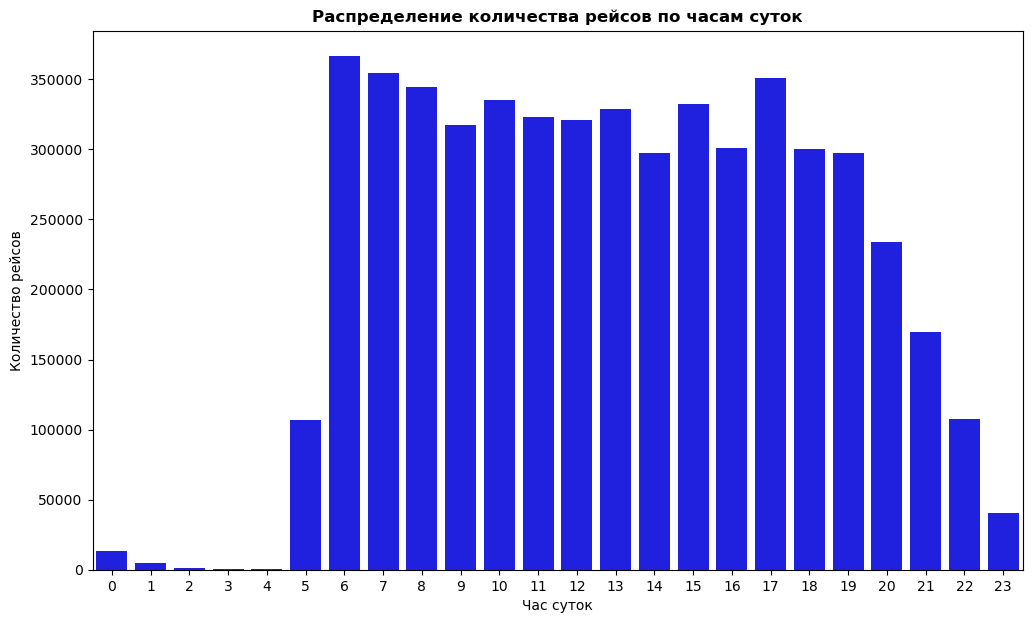

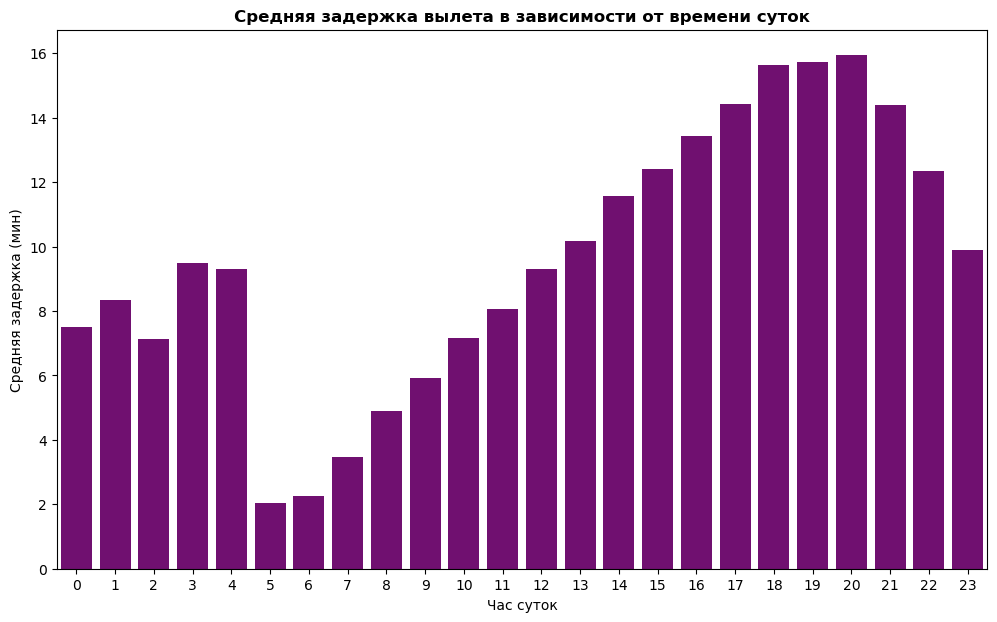

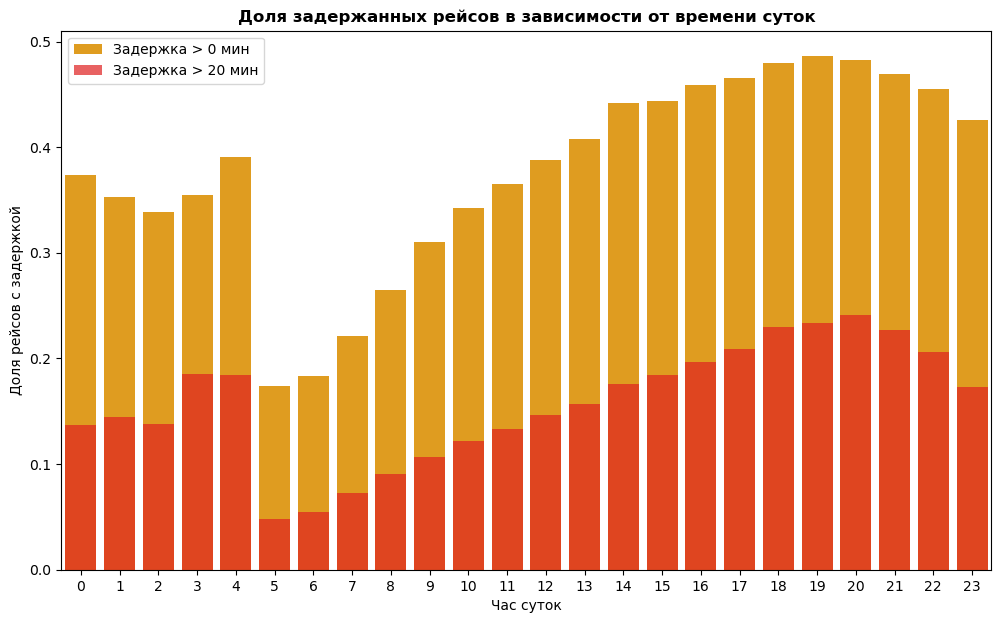

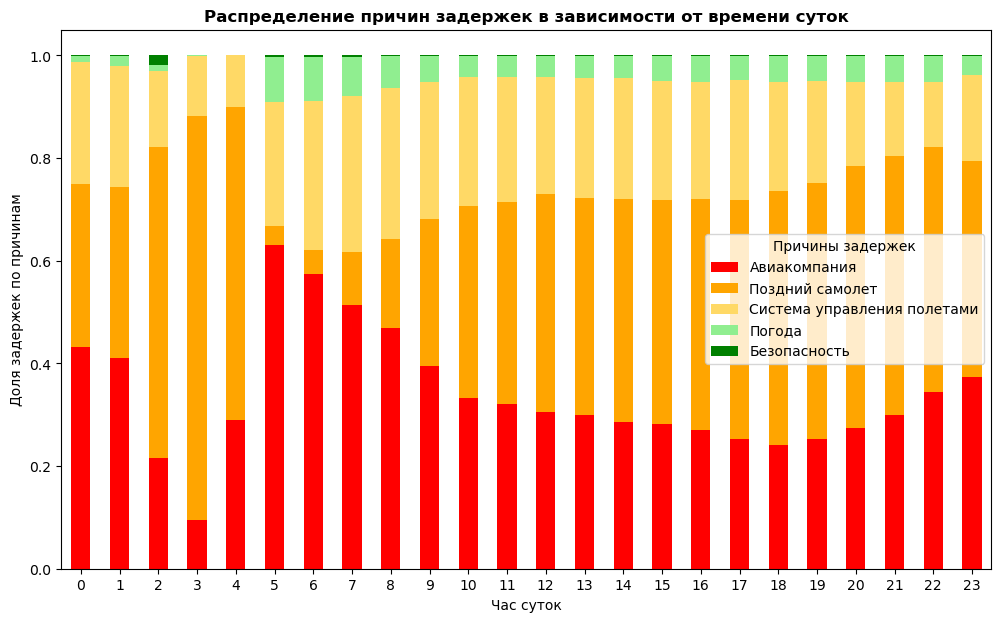

In [24]:
flights_data_clean = flights_data_clean.dropna(subset=["SCHEDULED_DEPARTURE", "DEPARTURE_DELAY"])
flights_data_clean["HOUR"] = (flights_data_clean["SCHEDULED_DEPARTURE"] // 100).astype(int)
flights_by_hour = flights_data_clean.groupby("HOUR", observed=True).size()

plt.figure(figsize=(12, 7))
sns.barplot(x=flights_by_hour.index, y=flights_by_hour.values, color="blue")

plt.xlabel("Час суток")
plt.ylabel("Количество рейсов")
plt.title("Распределение количества рейсов по часам суток", fontweight="bold")
plt.xticks(range(0, 24))
plt.show()

mean_delay_by_hour = flights_data_clean.groupby("HOUR", observed=True)["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(12, 7))
sns.barplot(x=mean_delay_by_hour.index, y=mean_delay_by_hour.values, color="purple")

plt.xlabel("Час суток")
plt.ylabel("Средняя задержка (мин)")
plt.title("Средняя задержка вылета в зависимости от времени суток", fontweight="bold")
plt.xticks(range(0, 24))
plt.show()

delayed_flights_by_hour = flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 0].groupby("HOUR", observed=True).size()
heavily_delayed_flights_by_hour = flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 20].groupby("HOUR", observed=True).size()
total_flights_by_hour = flights_data_clean.groupby("HOUR", observed=True).size()

delay_ratio_by_hour = (delayed_flights_by_hour / total_flights_by_hour).fillna(0)
heavily_delay_ratio_by_hour = (heavily_delayed_flights_by_hour / total_flights_by_hour).fillna(0)

plt.figure(figsize=(12, 7))
sns.barplot(x=delay_ratio_by_hour.index, y=delay_ratio_by_hour.values, color="orange", label="Задержка > 0 мин")
sns.barplot(x=heavily_delay_ratio_by_hour.index, y=heavily_delay_ratio_by_hour.values, color="red", label="Задержка > 20 мин", alpha=0.7)

plt.xlabel("Час суток")
plt.ylabel("Доля рейсов с задержкой")
plt.title("Доля задержанных рейсов в зависимости от времени суток", fontweight="bold")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

reasons_by_hour = flights_data_clean.groupby("HOUR", observed=True)[list(delay_reasons.keys())].sum()
reasons_ratio_by_hour = reasons_by_hour.div(reasons_by_hour.sum(axis=1), axis=0).fillna(0)

reasons_ratio_by_hour.rename(columns=delay_reasons).plot(kind="bar", stacked=True, color=[delay_colors[k] for k in delay_reasons], figsize=(12, 7))

plt.xlabel("Час суток")
plt.ylabel("Доля задержек по причинам")
plt.title("Распределение причин задержек в зависимости от времени суток", fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Причины задержек")
plt.show()



## Выводы:
Проанализировав четыре графика (распределение количества рейсов, средняя задержка, доля задержанных рейсов и причины задержек по часам), можно выявить основные проблемные временные периоды:

**1. Утренние часы (примерно 0–5 часов)**

- Рейсов выполняется очень мало, однако средняя задержка при этом остаётся достаточно высокой.
- На графике причин заметно преобладание факторов, связанных с человеческим фактором: задержка по вине авиакомпании и опоздание самолёта, то есть сама авиакомпания и экипажи могут быть не готовы к ранним вылетам или сталкиваются с последствиями поздних прилётов предыдущего дня.
- Возможная причина — недостаточная укомплектованность персоналом и ресурсами в ночное/раннее утреннее время, когда дежурит меньше специалистов и технических служб.

**2. Дневные и особенно вечерние часы (примерно 16–20 часов)**

- Объём рейсов здесь значительно выше, и одновременно увеличивается средняя задержка и доля рейсов с опозданием более 20 минут.
- Это отражает «эффект домино»: накопление мелких задержек в течение дня приводит к масштабным опозданиям к вечеру. Наиболее частые причины здесь — задержка по вине авиакомпании и опоздание самолёта.
- Вечером может сказываться и усталость персонала, а также высокая загруженность аэропортов и воздушного пространства.

### Предложения по улучшению:
- Для утренних рейсов:
Увеличить количество дежурного персонала и резервных самолётов в ночное время, чтобы вовремя обслуживать ранние вылеты.
- Для вечерних рейсов:
Добавить временные буферы между стыковками, чтобы сдерживать распространение цепных задержек, организовать дополнительное наземное обслуживание (бригады по заправке, технической проверке и уборке) во второй половине дня, когда наблюдается пик вылетов и накопленные опоздания.














## 📊 5. Анализ аэропортов и задержек вылетов
Теперь мы рассмотрим, какие аэропорты наиболее плохо справляются с задержками. Для этого построены два графика:

1. **Топ-20 аэропортов по средней задержке вылета** – отображает, какой аэропорт имеет наивысшую среднюю задержку (в минутах). Кроме того, для каждого аэропорта указано его место в общем рейтинге по количеству рейсов, что позволяет оценить значимость статистики.
2. **Топ-20 аэропортов по доле задержанных рейсов** – показывает, в каких аэропортах наблюдается наибольшая доля рейсов с задержкой, как при задержке > 0 минут, так и > 20 минут. Здесь также отражено место аэропорта в рейтинге по числу рейсов.


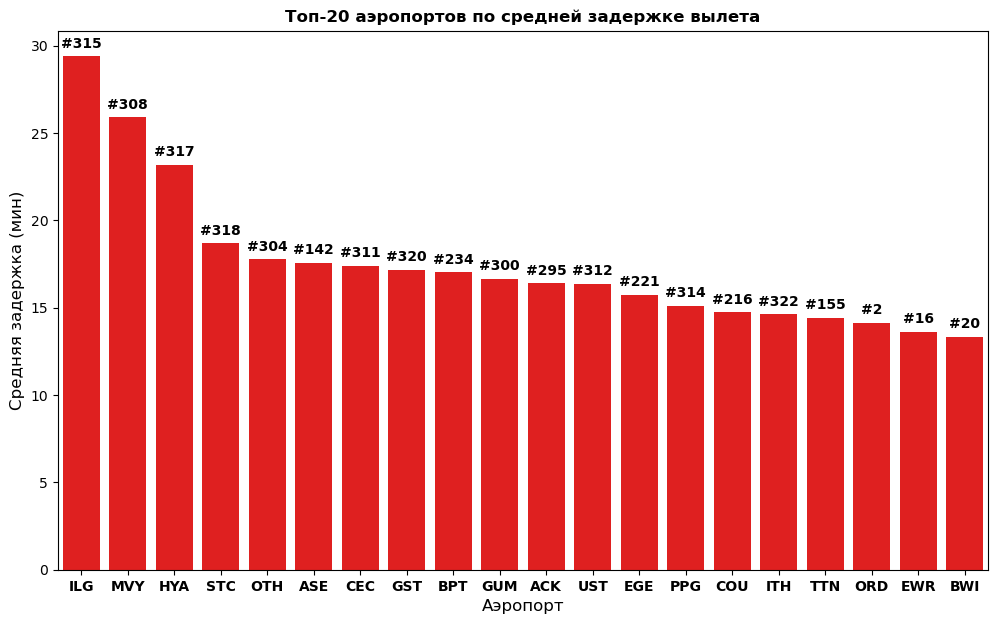

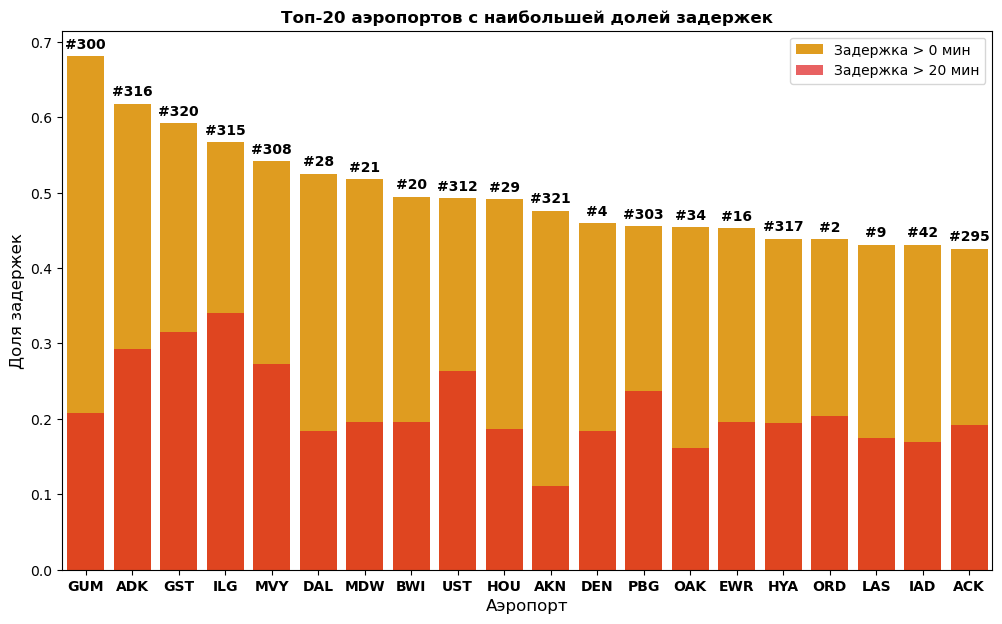

In [31]:
top_airports_by_flights = flights_data_clean["ORIGIN_AIRPORT"].value_counts()
airport_rank = {airport: rank + 1 for rank, airport in enumerate(top_airports_by_flights.index)}

top_airports_by_delay = flights_data_clean.groupby("ORIGIN_AIRPORT", observed=True)["DEPARTURE_DELAY"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_airports_by_delay.index.astype(str), y=top_airports_by_delay.values, color="red")

for index, airport in enumerate(top_airports_by_delay.index):
    plt.text(index, top_airports_by_delay[airport] + 0.5, f"#{airport_rank.get(airport, '—')}", ha="center", fontsize=10, fontweight="bold")

plt.xlabel("Аэропорт", fontsize=12)
plt.ylabel("Средняя задержка (мин)", fontsize=12)
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10)
plt.title("Топ-20 аэропортов по средней задержке вылета", fontweight="bold")
plt.show()

delay_ratio = (flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 0].groupby("ORIGIN_AIRPORT", observed=True).size() / flights_data_clean.groupby("ORIGIN_AIRPORT", observed=True).size()).fillna(0)
heavily_delay_ratio = (flights_data_clean[flights_data_clean["DEPARTURE_DELAY"] > 20].groupby("ORIGIN_AIRPORT", observed=True).size() / flights_data_clean.groupby("ORIGIN_AIRPORT", observed=True).size()).fillna(0)

top_airports_by_delay_ratio = delay_ratio.sort_values(ascending=False).head(20)
top_heavily_delay_ratio = heavily_delay_ratio[top_airports_by_delay_ratio.index]

plt.figure(figsize=(12, 7))
sns.barplot(x=top_airports_by_delay_ratio.index.astype(str), y=top_airports_by_delay_ratio.values, color="orange", label="Задержка > 0 мин")
sns.barplot(x=top_airports_by_delay_ratio.index.astype(str), y=top_heavily_delay_ratio.values, color="red", label="Задержка > 20 мин", alpha=0.7)

for index, airport in enumerate(top_airports_by_delay_ratio.index):
    plt.text(index, top_airports_by_delay_ratio[airport] + 0.01, f"#{airport_rank.get(airport, '—')}", ha="center", fontsize=10, fontweight="bold")

plt.xlabel("Аэропорт", fontsize=12)
plt.ylabel("Доля задержек", fontsize=12)
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10)
plt.title("Топ-20 аэропортов с наибольшей долей задержек", fontweight="bold")
plt.legend()
plt.show()


### Промежуточные выводы:

На основе двух графиков можно выделить 6 аэропортов, которые хуже всего справляются с задержками (с учетом загруженности аэропортов):

**1. MVY (№308 по количеству рейсов)**
- Входит в число лидеров по средней задержке вылета (около 28 минут).
- Присутствует в верхних позициях по доле задержанных рейсов, причём заметен высокий процент задержек свыше 20 минут.


**2. GUM (№300)**
- Имеет высокую среднюю задержку (порядка 22–23 минут).
- Возглавляет рейтинг по доле задержек, причём значительная часть из них — «сильные» (более 20 минут).


**3. ADK (№316)**
- Не входит в топ по средней задержке, но показывает крайне высокую долю задержанных рейсов, особенно свыше 20 минут.


**4. GST (№312)**
- По схеме, схожей с ADK: средняя задержка и доля сильно задержанных рейсов остаются высокими при относительно небольшом потоке рейсов.


**5. ILG (№315)**
- Возглавляет рейтинг по средней задержке (около 35 минут).


**6. HYA (№317)**
- Тоже в числе лидеров по средней задержке (более 25 минут).
- Значительная часть задержек превышает 20 минут, а при малом числе рейсов это особенно критично.


Рассмотрим теперь отдельно причины задержек для этих аэропортов.

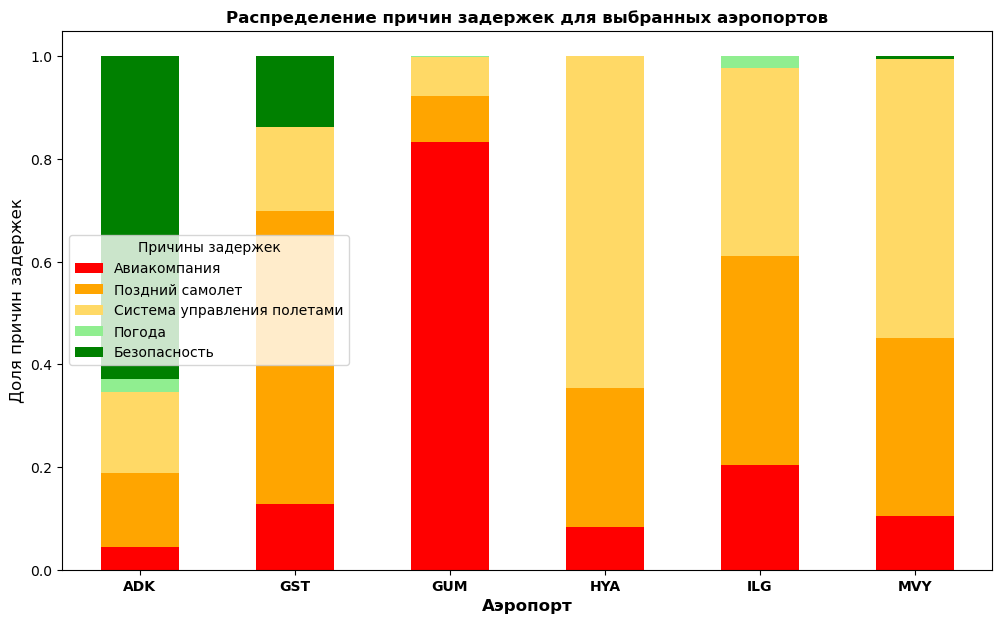

In [36]:
selected_airports = ["MVY", "GUM", "ADK", "GST", "ILG", "HYA"]

delay_reasons_data = flights_data_clean[flights_data_clean["ORIGIN_AIRPORT"].isin(selected_airports)]
delay_reasons_grouped = delay_reasons_data.groupby("ORIGIN_AIRPORT", observed=True)[list(delay_reasons.keys())].sum()

delay_reasons_ratio = delay_reasons_grouped.div(delay_reasons_grouped.sum(axis=1), axis=0).fillna(0)

ax = delay_reasons_ratio.rename(columns=delay_reasons).plot(
    kind="bar",
    stacked=True,
    color=[delay_colors[k] for k in delay_reasons],
    figsize=(12, 7)
)

plt.xlabel("Аэропорт", fontsize=12, fontweight="bold")
plt.ylabel("Доля причин задержек", fontsize=12)
plt.title("Распределение причин задержек для выбранных аэропортов", fontweight="bold")
plt.xticks(rotation=0, fontsize=10, fontweight="bold")
plt.yticks(fontsize=10)
plt.legend(title="Причины задержек")
plt.show()

Если ориентироваться на преобладание причин, зависящих от инфраструктуры аэропорта, то можно выделить ADK, GUM и HYA:

#### **ADK**
Если смотреть на распределение причин задержек для ADK, видно, что значительную долю занимает задержка из-за безопасности (зелёная часть столбца). Это может указывать на особые требования к досмотру пассажиров и багажа или недостаточную пропускную способность пунктов контроля.


#### **GUM**
Имеет высокую среднюю задержку и значительный процент сильно задержанных рейсов. При этом большую долю занимают внутренние факторы (в частности, «задержка по вине авиакомпании»).
Рекомендуется оптимизировать взаимодействие с авиакомпаниями, пересмотреть слоты вылетов и увеличить интервалы обслуживания в пиковые периоды.


#### **HYA**
Примечателен существенной долей задержек, связанных с системой управления полётами, что напрямую указывает на проблемы в работе диспетчерской инфраструктуры аэропорта (или взаимодействии с ней).
